据世界卫生组织报告，宫颈癌作为危害女性健康的主要恶性肿瘤之一，是欠发达地区女性致死的第二大癌症。中国医学科学院肿瘤医院全国肿瘤登记中心数据统计显示，2003～2007年中国女性宫颈癌发病率为9.62/10万 ,在癌症发病构成中排列第7位；同期宫颈癌死亡率为2.54/10万，在癌症死亡原因中排列第14位。宫颈癌对女性健康产生了巨大威胁，宫颈癌如能早期发现并提前治疗，能有效降低患病死亡率。

本案例基于uci公开的宫颈癌患者数据集，包含委内瑞拉“Hospital Universitario de Caracas”医院的858例样本数据，其中包括女性的年龄、性伴侣数量、初次性行为年龄、抽烟习惯、是否携带人类乳头瘤病毒(HPV)等32个特征。我们尝试使用机器学习中的分类模型对样本是否患病进行预测分析。

# 目录
1. [数据说明与预处理](#1.数据说明与预处理)<br> 
&emsp;&emsp;1.1 [数据说明](#1.1)<br> 
&emsp;&emsp;1.2 [缺失值处理](#1.2)<br>
2. [探索性分析](#2.探索性分析)  
&emsp;&emsp;2.1 [新建目标特征](#2.1)<br> 
&emsp;&emsp;2.2 [特征的分布情况](#2.2)<br>
&emsp;&emsp;2.3 [特征与患病的相关分析](#2.3)<br>
3. [构建预测模型](#3.构建预测模型)   
&emsp;&emsp;3.1 [数据标准化](#3.1)<br>
&emsp;&emsp;3.2 [数据划分与分层采样](#3.2)<br>
&emsp;&emsp;3.3 [分类模型](#3.2)<br>
&emsp;&emsp;3.4 [离群值检测](#3.3)<br>
&emsp;&emsp;3.5 [合成采样](#3.4)<br>
4. [总结](#4.总结)

# 1.数据说明与预处理

## <a id=1.1></a>1.1 数据说明
数据集包含32个特征和4个目标特征(数据的最后四列)。`Hinselmann`(阴道镜检查),`Schiller`(碘试验),`Citology`(薄层液基细胞学检查),`Biopsy`(宫颈活检)，展示采用不同诊断方式的结果。为了避免患病检查结果不同意而存在误诊，所以在案例中我们组合新的诊断策略，往患病方向进行倾斜：只要诊断结果中出现1(大于等于1)时，均认为该女性确诊为宫颈癌患者，否则认为未患病(0)。

数据共计858条，各数据指标含义如下表所示：

|列名|字段类型|含义说明|
|:-:|:-:|:-:|
|Age|Numerical|年龄|
|Number of sexual partners|Numerical|性伴侣数量|
|First sexual intercourse|Numerical|初次性行为年龄|
|Num of pregnancies|Numerical|怀孕次数|
|Smokes|Boolean|抽烟|
|Smokes (years)|Numerical|抽烟（年）|
|Smokes (packs/year)|Numerical|抽烟（包/年）|
|Hormonal Contraceptives|Boolean|荷尔蒙避孕药|
|Hormonal Contraceptives (years)|Numerical|荷尔蒙避孕药（年）|
|IUD|Boolean|宫内节育器|
|IUD (years)|Numerical|宫内节育器（年）|
|STDs|Boolean|性病|
|STDs (number)|Numerical|性病（数量）|
|STDs:condylomatosis|Boolean|性病：尖锐湿疣|
|STDs:cervical condylomatosis|Boolean|性病：宫颈湿疣|
|STDs:vaginal condylomatosis|Boolean|性病：阴道尖锐湿疣|
|STDs:vulvo-perineal condylomatosis|Boolean|性病：外阴 - 会阴性湿疣|
|STDs:syphilis|Boolean|性病：梅毒|
|STDs:pelvic inflammatory disease|Boolean|性病：盆腔炎|
|STDs:genital herpes|Boolean|性病：生殖器疱疹|
|STDs:molluscum contagiosum|Boolean|性病：传染性软疣|
|STDs:AIDS|Boolean|性病：艾滋病|
|STDs:HIV|Boolean|性病：HIV|
|STDs:Hepatitis B|Boolean|性病：乙型肝炎|
|STDs:HPV|Boolean|性病：HPV|
|STDs: Number of diagnosis|Numerical|性病：诊断次数|
|STDs: Time since first diagnosis|Numerical|性病：首次诊断以来的时间|
|STDs: Time since last diagnosis|Numerical|性病：最近诊断以来的时间|
|Dx:Cancer|Boolean|Dx：癌症|
|Dx:CIN|Boolean|Dx：CIN|
|Dx:HPV|Boolean|Dx：HPV|
|Dx|Boolean|Dx|
|Hinselmann|Numerical|阴道镜检查：目标特征|
|Schiller|Numerical|碘试验：目标特征|
|Citology|Numerical|薄层液基细胞学检查：目标特征|
|Biopsy|Numerical|宫颈活检：目标特征|

In [237]:
# 忽略所有警告
import warnings
warnings.filterwarnings("ignore")

# 调用相应的模块
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# 读入数据
data = pd.read_csv("./input/risk_factors_cervical_cancer.csv")

print(data.shape)
data.head()

(858, 36)


Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD IUD (years) STDs STDs (number)  \
0                             0.0  0.0         0.0  0.0           0.0   
1                             0.0  0.0         0.0  0.0           0.0   
2                             0.0  0.0         0.0  0.0           0.0   
3                             3.0  0.0         0.0  0.0           0.0   
4                            15.0  0.0         0.0  0.0           0.0   

  STDs:condylomatosis STDs:cervical condylomatosis  \
0                 0.0                          0.0   
1                 0.0                          0.0   
2                 0.0                          0.0   
3                 0.0                          0.0   
4                 0.0                          0.0   

  STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

  STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
0           0.0                              0.0                 0.0   
1           0.0                              0.0                 0.0   
2           0.0                              0.0                 0.0   
3           0.0                              0.0                 0.0   
4           0.0                              0.0                 0.0   

  STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV  \
0                        0.0       0.0      0.0              0.0      1.0   
1                        0.0       0.0      0.0              0.0      0.0   
2                        0.0       0.0      0.0              0.0      0.0   
3                        0.0       0.0      0.0              0.0      0.0   
4                        0.0       0.0      0.0              0.0      0.0   

   STDs: Number of diagnosis STDs: Time since first diagnosis  \
0                          0                                ?   
1                          0                                ?   
2                          0                                ?   
3                          0                                ?   
4                          0                                ?   

  STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  \
0                               ?          0       0       0   0           0   
1                               ?          0       0       0   0           0   
2                               ?          0       0       0   0           0   
3                               ?          1       0       1   0           0   
4                               ?          0       0       0   0           0   

   Schiller  Citology  Biopsy  
0         0         0       0  
1         0         0       0  
2         0         0       0  
3         0         0     

可以看到，宫颈癌数据集中共有858个样本，每个样本有36个特征；同时我们也发现数据中存在一些`?`，代表未知(即缺失)。接下来，我们将缺失值(`?`表示)转换成Numpy中的空置形式(`NaN`)。
## <a id=1.2></a>1.2 缺失值处理

In [238]:
# 使用np.nan代替？
import numpy as np
data.replace({'?':np.nan},inplace=True)
data.head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                      NaN                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD IUD (years) STDs STDs (number)  \
0                             0.0  0.0         0.0  0.0           0.0   
1                             0.0  0.0         0.0  0.0           0.0   
2                             0.0  0.0         0.0  0.0           0.0   
3                             3.0  0.0         0.0  0.0           0.0   
4                            15.0  0.0         0.0  0.0           0.0   

  STDs:condylomatosis STDs:cervical condylomatosis  \
0                 0.0                          0.0   
1                 0.0                          0.0   
2                 0.0                          0.0   
3                 0.0                          0.0   
4                 0.0                          0.0   

  STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

  STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
0           0.0                              0.0                 0.0   
1           0.0                              0.0                 0.0   
2           0.0                              0.0                 0.0   
3           0.0                              0.0                 0.0   
4           0.0                              0.0                 0.0   

  STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV  \
0                        0.0       0.0      0.0              0.0      1.0   
1                        0.0       0.0      0.0              0.0      0.0   
2                        0.0       0.0      0.0              0.0      0.0   
3                        0.0       0.0      0.0              0.0      0.0   
4                        0.0       0.0      0.0              0.0      0.0   

   STDs: Number of diagnosis STDs: Time since first diagnosis  \
0                          0                              NaN   
1                          0                              NaN   
2                          0                              NaN   
3                          0                              NaN   
4                          0                              NaN   

  STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  \
0                             NaN          0       0       0   0           0   
1                             NaN          0       0       0   0           0   
2                             NaN          0       0       0   0           0   
3                             NaN          1       0       1   0           0   
4                             NaN          0       0       0   0           0   

   Schiller  Citology  Biopsy  
0         0         0       0  
1         0         0       0  
2         0         0       0  
3         0         0     

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

通过统计函数我们可以发现，大多数列均存在小部分的缺失，但是`STDs: Time since first diagnosis`(性病：首次诊断以来的时间)和`STDs: Time since last diagnosis`(性病：最近诊断以来的时间)存在大范围缺失，接下来我们选择删除这两列。

In [240]:
# 删除掉缺失严重的两列
data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)
data.shape

(858, 34)

再通过观察统计函数返回的信息，我们发现`STDs`(性病)开头的特征均存在相同的缺失值数量，可能是部分样本在这些特征上统一缺失，我们查看一下。

In [241]:
data[data['STDs:HPV'].isnull()].head()

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
71   34                       NaN                      NaN                3.0   
74   35                       2.0                     17.0                2.0   
90   36                       1.0                     13.0                6.0   
95   31                       4.0                     16.0                2.0   
98   31                       1.0                     20.0                5.0   

   Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
71    0.0            0.0                 0.0                     NaN   
74    1.0           15.0                0.32                     NaN   
90    0.0            0.0                 0.0                     NaN   
95    0.0            0.0                 0.0                     NaN   
98    0.0            0.0                 0.0                     NaN   

   Hormonal Contraceptives (years)  IUD IUD (years) STDs STDs (number)  \
71                             NaN  NaN         NaN  NaN           NaN   
74                             NaN  NaN         NaN  NaN           NaN   
90                             NaN  NaN         NaN  NaN           NaN   
95                             NaN  NaN         NaN  NaN           NaN   
98                             NaN  NaN         NaN  NaN           NaN   

   STDs:condylomatosis STDs:cervical condylomatosis  \
71                 NaN                          NaN   
74                 NaN                          NaN   
90                 NaN                          NaN   
95                 NaN                          NaN   
98                 NaN                          NaN   

   STDs:vaginal condylomatosis STDs:vulvo-perineal condylomatosis  \
71                         NaN                                NaN   
74                         NaN                                NaN   
90                         NaN                                NaN   
95                         NaN                                NaN   
98                         NaN                                NaN   

   STDs:syphilis STDs:pelvic inflammatory disease STDs:genital herpes  \
71           NaN                              NaN                 NaN   
74           NaN                              NaN                 NaN   
90           NaN                              NaN                 NaN   
95           NaN                              NaN                 NaN   
98           NaN                              NaN                 NaN   

   STDs:molluscum contagiosum STDs:AIDS STDs:HIV STDs:Hepatitis B STDs:HPV  \
71                        NaN       NaN      NaN              NaN      NaN   
74                        NaN       NaN      NaN              NaN      NaN   
90                        NaN       NaN      NaN              NaN      NaN   
95                        NaN       NaN      NaN              NaN      NaN   
98                        NaN       NaN      NaN              NaN      NaN   

    STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  \
71                          0          0       0       0   0           0   
74                          0          0       0       0   0           0   
90                          0          0       0       0   0           0   
95                          0          0       0       0   0           0   
98                          0          0       0       0   0           0   

    Schiller  Citology  Biopsy  
71         0         0       0  
74         0         0       0  
90         0         0       0  
95         0         0       0  
98         0         0       0

我们可以看到这105个样本中以`STDs`(性病)开头的特征大幅度统一缺失，我们以`STDs:HPV`列为入口，将这些样本数据进行删除。

In [242]:
data = data[~data['STDs:HPV'].isnull()]
data.isnull().sum().sort_values(ascending=False).head(15)

Num of pregnancies                    48
IUD (years)                           19
IUD                                   19
Hormonal Contraceptives               15
Hormonal Contraceptives (years)       15
Number of sexual partners             14
Smokes                                10
Smokes (years)                        10
Smokes (packs/year)                   10
First sexual intercourse               6
STDs:vulvo-perineal condylomatosis     4
STDs:syphilis                          4
STDs (number)                          4
STDs:condylomatosis                    4
STDs:cervical condylomatosis           4
dtype: int64

此时我们还有10列特征存在小部分缺失。
+ 关于性伴侣数量(`Number of sexual partners`)、初次性行为年龄(`First sexual intercourse`)、怀孕次数(`Num of pregnancies	`)等特征采用众数进行填补；
+ 对于抽烟的三个特征(`Smokes`、`Smokes (years)`、`Smokes (packs/year)`)、荷尔蒙避孕药的两个特征(`Hormonal Contraceptives`、`Hormonal Contraceptives (years)`)、宫内节育器的两个特征(`IUD`、`IUD (years)`)，通过观察：在输出特征缺失值时，发现这些特征的缺失数量均相等，在之前的分析中发现同一组特征中存在缺失值的是相同的人，我们推断这些缺失是患者没有此类特征，所以在此均填为0。

In [243]:
data['Number of sexual partners'].fillna(data['Number of sexual partners'].mode().values[0],inplace=True)
data['First sexual intercourse'].fillna(data['First sexual intercourse'].mode().values[0],inplace=True)
data['Num of pregnancies'].fillna(data['Num of pregnancies'].mode().values[0],inplace=True)

data.fillna('0',inplace=True)
print(data.shape)
data.info()

(757, 34)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 857
Data columns (total 34 columns):
Age                                   757 non-null int64
Number of sexual partners             757 non-null object
First sexual intercourse              757 non-null object
Num of pregnancies                    757 non-null object
Smokes                                757 non-null object
Smokes (years)                        757 non-null object
Smokes (packs/year)                   757 non-null object
Hormonal Contraceptives               757 non-null object
Hormonal Contraceptives (years)       757 non-null object
IUD                                   757 non-null object
IUD (years)                           757 non-null object
STDs                                  757 non-null object
STDs (number)                         757 non-null object
STDs:condylomatosis                   757 non-null object
STDs:cervical condylomatosis          757 non-null object
STDs:vaginal con

此时我们已经全部处理了数据中的缺失值，经过删除和填补，最后的样本数为757，特征数为34。

由于原始数据中存在`?`等特殊字符，数据的第2列到25列的数据均为`object`类型，表示这些值都是以字符表示，但实际上存储的是数值类数据。为了方便后续的分析，我们需要将这些特征转换为`int`类型。

In [244]:
data.iloc[:,1:25] = data.iloc[:,1:25].astype(float).astype(int)
data.head()

Age  Number of sexual partners  First sexual intercourse  \
0   18                          4                        15   
1   15                          1                        14   
2   34                          1                        15   
3   52                          5                        16   
4   46                          3                        21   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1       0               0                    0   
1                   1       0               0                    0   
2                   1       0               0                    0   
3                   4       1              37                   37   
4                   4       0               0                    0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  \
0                        0                                0    0            0   
1                        0                                0    0            0   
2                        0                                0    0            0   
3                        1                                3    0            0   
4                        1                               15    0            0   

   STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  \
0     0              0                    0                             0   
1     0              0                    0                             0   
2     0              0                    0                             0   
3     0              0                    0                             0   
4     0              0                    0                             0   

   STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  \
0              0                                 0                    0   
1              0                                 0                    0   
2              0                                 0                    0   
3              0                                 0                    0   
4              0                                 0                    0   

   STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  \
0                           0          0         0                 0   
1                           0          0         0                 0   
2                           0          0         0                 0   
3                           0          0         0                 0   
4                           0          0         0                 0   

   STDs:HPV  STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
0         1                          0          0       0       0   0   
1         0                          0          0       0       0   0   
2         0                          0          0       0       0   0   
3         0                          0          1       0       1   0   
4         0                          0          0       0       0   0   

   Hinselmann  Schiller  Citology  Biopsy  
0           0         0         0       0  
1           0         0         0       0  
2           0         0         0       0  
3           0         0         0       0  
4           0         0         0       0

# 2.探索性分析
## <a id=2.1></a>2.1 新建目标特征

4个目标特征`Hinselmann`(阴道镜检查),`Schiller`(碘试验),`Citology`(薄层液基细胞学检查),`Biopsy`(宫颈活检)是采用不同诊断方式的结果。为了避免患病检查结果不同意见而存在误诊，所以在案例中我们组合新的诊断策略，往患病方向进行倾斜：只要诊断结果中出现1(大于等于1)时，均确认为该女性患有宫颈癌，否则认为未患病，我们新建一列`target`表示是否患病，如果患病则样本取值为1，不患病样本取值为0。

In [245]:
data['target'] = data['Hinselmann'] + data['Schiller'] + data['Citology'] + data['Biopsy']
data.drop(['Hinselmann','Schiller','Citology','Biopsy'],axis = 1,inplace = True)

data['target'] = data['target'].apply(lambda x : 1 if x > 0 else 0)

data['target'].value_counts()

0    658
1     99
Name: target, dtype: int64

通过计算`target`的值并进行分类统计，可以看到最终患病人数为99人。接下来我们通过统计函数查看各个特征的取值分布情况。

In [246]:
data.describe(include = 'all')

Age  Number of sexual partners  First sexual intercourse  \
count  757.000000                 757.000000                757.000000   
mean    28.546896                   2.523118                 17.060766   
std      9.664038                   1.670173                  2.839444   
min     13.000000                   1.000000                 10.000000   
25%     21.000000                   2.000000                 15.000000   
50%     27.000000                   2.000000                 17.000000   
75%     34.000000                   3.000000                 18.000000   
max     89.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          757.000000  757.000000      757.000000           757.000000   
mean             2.232497    0.142668        1.203435             0.420079   
std              1.457094    0.349966        4.106820             2.267324   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               757.000000                       757.000000  757.000000   
mean                  0.626156                         2.095112    0.109643   
std                   0.484143                         3.640083    0.312651   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.000000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        22.000000    1.000000   

       IUD (years)        STDs  STDs (number)  STDs:condylomatosis  \
count   757.000000  757.000000     757.000000           757.000000   
mean      0.498018    0.104359       0.175694             0.058124   
std       1.924242    0.305928       0.560651             0.234133   
min       0.000000    0.000000       0.000000             0.000000   
25%       0.000000    0.000000       0.000000             0.000000   
50%       0.000000    0.000000       0.000000             0.000000   
75%       0.000000    0.000000       0.000000             0.000000   
max      19.000000    1.000000       4.000000             1.000000   

       STDs:cervical condylomatosis  STDs:vaginal condylomatosis  \
count                         757.0                   757.000000   
mean                            0.0                     0.005284   
std                             0.0                     0.072547   
min                             0.0                     0.000000   
25%                             0.0                     0.000000   
50%                             0.0                     0.000000   
75%                             0.0                     0.000000   
max                             0.0                     1.000000   

       STDs:vulvo-perineal condylomatosis  STDs:syphilis  \
count                          757.000000     757.000000   
mean                             0.056803       0.023778   
std                              0.231619       0.152458   
min                              0.000000       0.000000   
25%                              0.000000       0.000000   
50%                              0.000000       0.000000   
75%                              0.000000       0.000000   
max                              1.000000       1.000000   

       STDs:pelvic inflammatory disease  STDs:genital herpes  \
count                        757.000000           757.000000   
mean               

可以看到`STDs:cervical condylomatosis`性病：尖锐湿疣和`STDs:AIDS`性病：艾滋病两个特征的取值均全部为0，对于分析和预测没有用处，我们将这两列删除。

In [247]:
data.drop(['STDs:cervical condylomatosis','STDs:AIDS'],axis = 1,inplace = True)

## <a id=2.2></a>2.2 特征的分布情况
接下来我们先统计一下典型特征的分布情况，数据集中样本的年龄、初次性行为年龄、性伴侣数量、怀孕次数的分布如下：

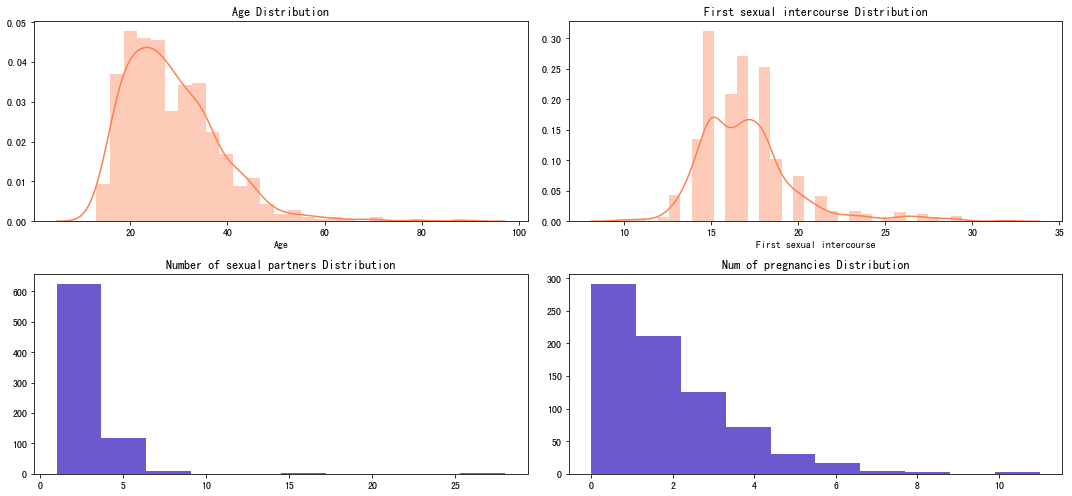

In [248]:
fig,ax = plt.subplots(2,2,figsize = (15,7))

ax1 = plt.subplot(221)
sns.distplot(data['Age'],color = 'coral') 
ax1.set_title('Age Distribution')

ax2 = plt.subplot(222)
sns.distplot(data['First sexual intercourse'],color = 'coral') 
ax2.set_title('First sexual intercourse Distribution')

ax3 = plt.subplot(223)
plt.hist(data['Number of sexual partners'],color = 'slateblue') 
ax3.set_title('Number of sexual partners Distribution')

ax4 = plt.subplot(224)
plt.hist(data['Num of pregnancies'],color = 'slateblue') 
ax4.set_title('Num of pregnancies Distribution')

plt.tight_layout()
plt.show()  

可以看到样本的年龄大部分集中在15-40岁，初次性行为年龄主要集中在15-20岁之间。性伴侣数量1-5个的人数最多，也会有个别女性的性伴侣数量达到15，25等，怀孕次数呈阶梯状下降，0-4次的人数居多。

## <a id=2.3></a>2.3 特征与患病的相关分析
接下来我们抽取各个特征做分析，查看该特征与发病之间的关系，并通过可视化图标来直观地展示。我们通过散点图展示年龄、初次性行为年龄与是否发病之间的关系。

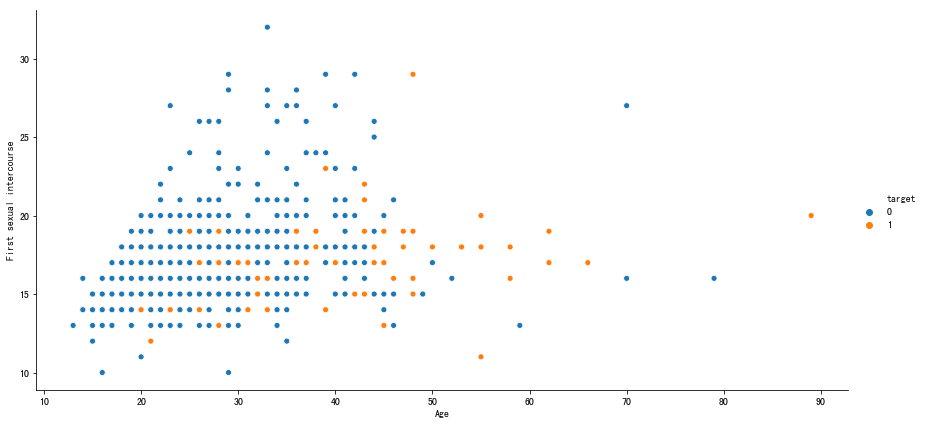

In [249]:
sns.relplot(x='Age', y='First sexual intercourse', hue='target', data = data,aspect=2,height=6)
plt.show()

可以看到数据点集分布中，患病人群(黄点)的年龄相对比不患病(蓝点)的年龄稍大，但初次性行为年龄分布无规律，可以初步判定初次性行为年龄与患宫颈癌与否关联度较低。接下来我们选取了其中两个其他特征（是否抽烟`Smokes`和是否使用荷尔蒙避孕药`Hormonal Contraceptives`），探索其与是否患病之间的相关关系。

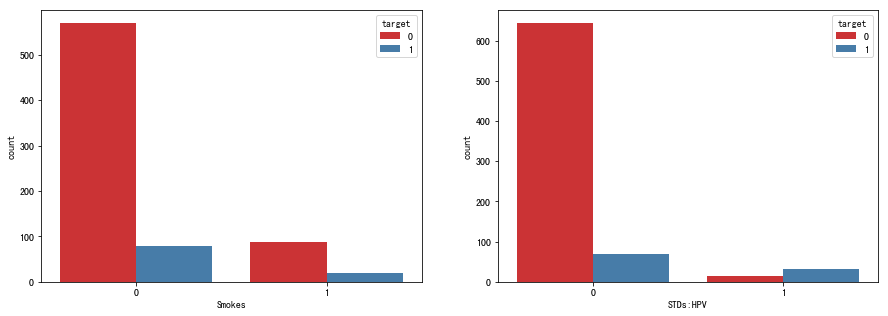

In [250]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='Smokes', hue='target', data = data, palette="Set1",ax=ax1)
sns.countplot(x='STDs:HPV', hue='target', data = data, palette="Set1",ax=ax2)

plt.show()

可以看到：
+ 该数据集中抽烟与否和发病与否关联不大，在在抽烟和不抽烟的群体中的两个群体中，患病比例基本持平；
+ 是否感染HPV病毒与罹患宫颈癌的关联非常密切，感染HPV病毒的群体中大多数均患有宫颈癌。这一分析结果与HPV病毒就是宫颈癌主要诱因的医学结论相吻合，也侧面印证了HPV疫苗在宫颈癌预防工作中的重大意义。

# 3.构建预测模型
+ 对连续性特征进行标准化
+ 按照分层采样对训练集和测试集进行划分
+ 使用单模型、集成模型分别构建预测模型
+ 使用异常值检测模型进行预测
+ 使用合成采样优化预测模型

## <a id=3.1></a>3.1 数据标准化

在Sklearn中的preprocessing模块，存在scale()函数，用于对数据进行Z-score标准化。

In [251]:
from sklearn.preprocessing import scale
continuous_columns = ['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)','STDs: Number of diagnosis']
data[continuous_columns] = scale(data[continuous_columns])

data.head()

Age  Number of sexual partners  First sexual intercourse  \
0 -1.092076                   0.884854                 -0.726244   
1 -1.402711                  -0.912555                 -1.078658   
2  0.564641                  -0.912555                 -0.726244   
3  2.428448                   1.483990                 -0.373829   
4  1.807179                   0.285718                  1.388243   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0           -0.846419       0       -0.293227            -0.185398   
1           -0.846419       0       -0.293227            -0.185398   
2           -0.846419       0       -0.293227            -0.185398   
3            1.213835       1        8.722134            16.144185   
4            1.213835       0       -0.293227            -0.185398   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  IUD (years)  \
0                        0                        -0.575948    0    -0.258984   
1                        0                        -0.575948    0    -0.258984   
2                        0                        -0.575948    0    -0.258984   
3                        1                         0.248754    0    -0.258984   
4                        1                         3.547562    0    -0.258984   

   STDs  STDs (number)  STDs:condylomatosis  STDs:vaginal condylomatosis  \
0     0      -0.313582                    0                            0   
1     0      -0.313582                    0                            0   
2     0      -0.313582                    0                            0   
3     0      -0.313582                    0                            0   
4     0      -0.313582                    0                            0   

   STDs:vulvo-perineal condylomatosis  STDs:syphilis  \
0                                   0              0   
1                                   0              0   
2                                   0              0   
3                                   0              0   
4                                   0              0   

   STDs:pelvic inflammatory disease  STDs:genital herpes  \
0                                 0                    0   
1                                 0                    0   
2                                 0                    0   
3                                 0                    0   
4                                 0                    0   

   STDs:molluscum contagiosum  STDs:HIV  STDs:Hepatitis B  STDs:HPV  \
0                           0         0                 0         1   
1                           0         0                 0         0   
2                           0         0                 0         0   
3                           0         0                 0         0   
4                           0         0                 0         0   

   STDs: Number of diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  target  
0                  -0.309505          0       0       0   0       0  
1                  -0.309505          0       0       0   0       0  
2                  -0.309505          0       0       0   0       0  
3                  -0.309505          1       0       1   0       0  
4                  -0.309505          0       0       0   0       0

## <a id=3.2></a>3.2 数据集划分与分层采样

In [252]:
data['target'].value_counts()

0    658
1     99
Name: target, dtype: int64

可以看到，数据集中患病样本远少于未患病样本，比例约为6:1，对于此类不平衡数据，为了更客观地构建预测模型和评估模型效果，应该尽量使得训练集和测试集中患病样本的比例相一致。因此需要使用分层采样的方法来划分训练集和测试集。

下面我们开始对数据进行训练集与测试集的划分。在Sklearn中的`model_selection`模块，存在`train_test_split()`函数，用作训练集和测试集划分，函数语法为：`train_test_split(x,y,test_size = None,random_state = None,stratify = y)`，其中：
+ `x,y`: 分别为预测所需的所有特征，以及需要预测的特征。
+ `test_size`: 测试集比例，例如`test_size=0.2`则表示划分`20%`的数据作为测试集。
+ `random_state`: 随机种子，因为划分过程是随机的，为了进行可重复的训练，需要固定一个`random_state`，结果重现。
+ `stratify`: 使用分层采样，保证从患病样本和未患病样本中抽取了同样比例的训练集和测试集。
+ 函数最终将返回四个变量，分别为`x`的训练集和测试集，以及`y`的训练集和测试集。

In [253]:
from sklearn import model_selection
x = data.drop(['target'],axis=1)
y = data['target']

x_train,x_test,y_train,y_test = model_selection.train_test_split(x, y,test_size=0.2,random_state = 33,stratify=y)


## <a id=3.3></a>3.3 分类模型

鉴于前面提到的样本不平衡问题，如果仅计算预测总体的准确率，难免会有所偏差。针对这种情况，我们还采用了混淆矩阵(confusion matrix)来更细致地统计预测的结果。

支持向量机(support vector machine)，简称SVM，是一种基于监督的二类分类模型。 通俗的说，SVM是通过选取高维空间上的一个超平面（plane）来进行数据分类，这个超平面即为分类平面，构成这个超平面的向量，即为支撑向量。SVM先已广泛应用于统计分析，回归分析和机器学习中。

accuracy: 0.8092105263157895
recall: 0.5


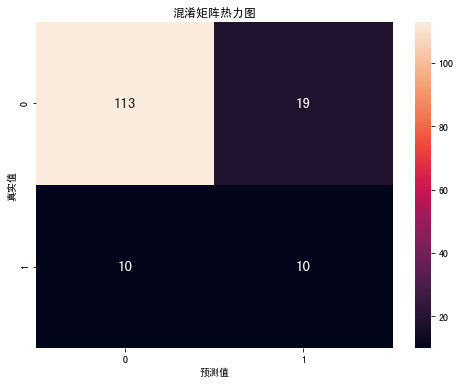

In [254]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

svm = SVC(kernel = 'rbf',class_weight='balanced',random_state = 4)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()


通过在测试集上产生的混淆矩阵，我们可以看到：在真实值为“0”的情况下，132个数据中有19个数据预测值误判为“1”，即这些数据样本被错误预测为患病；而在真实值为“1”的情况下误诊率很高，20个数据仅有10个被判断准确。接下来我们尝试一下集成模型Xgboost。

Xgboost是Boosting算法的一种，在GBDT的基础上进行改进，使之更强大，适用于更大范围。

accuracy: 0.875
recall: 0.3


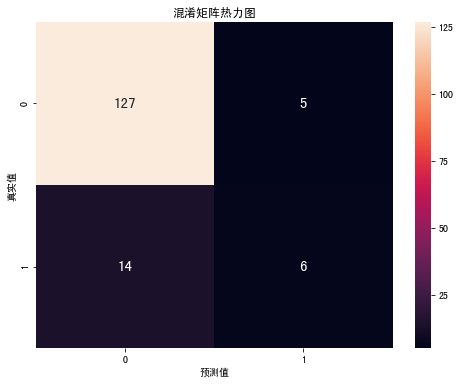

In [255]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = xgb.XGBClassifier(max_depth = 8,class_weight='balanced',random_state = 4)

xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print('accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()

我们分别采用了两种模型(SVC、Xgboost)，对少数类(患病)的识别情况都不理想，正类(患病类)的召回率太低。

## <a id=3.4></a>3.4 离群值检测
在分类问题中，当两类样本不平衡时，我们可以尝试将个数比例极小的那部分当做离群点来处理，从另外一种角度来完成分类任务。

OneClassSVM是一种非监督的算法。它是指在训练集中只有一类positive(或者negative)的数据，而没有另外的一类。而这时，需要学习(learn)的就是边界(boundary)，而不是最大间隔(maximum margin)。如下图中所示，

+ 白点：训练集
+ 红线：边界
+ 绿点：正常测试数据
+ 红点：异常的测试数据
![png](http://cookdata.cn/media/note_images/oneclasssvm_1573526500634_5d14.jpg)
在Python中使用sklearn.svm的OneClassSVM类构建OneClassSVM模型。

accuracy: 0.6578599735799208
recall: 0.5353535353535354


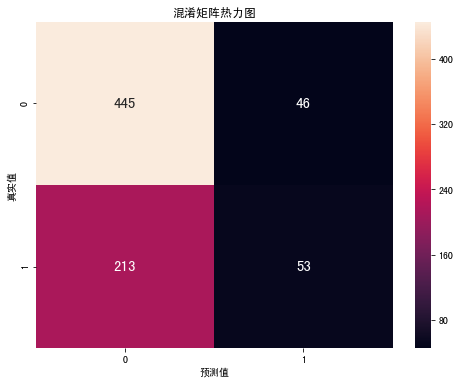

In [256]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.35, kernel="rbf")
y_pred = clf.fit(x).predict(x)

y_pred = np.where(y_pred==1, 0, y_pred) 
y_pred = np.where(y_pred==-1, 1, y_pred) 
print('accuracy:',accuracy_score(y,y_pred))
print('recall:',recall_score(y,y_pred))

conf_matrix = confusion_matrix(y_pred,y)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()

孤立森林(IsolationForest)是一个高效的离群点监测算法。该算法与随机森林同源。孤立森林是由N个树构成，每棵树的的学习过程非常随机：随机抽取特征、随机选取分割值来建立决策树，从而将每一个样本分到一个独立的子节点上，这样我们就得到了N个不相同的树。从超空间的角度看，不断地用随机选取的超平面切分样本点，直到所有的样本点都被这些超平面“孤立”起来，即与其他样本点分隔开了。

在Python中使用sklearn.ensemble的IsolationForest类构建孤立森林模型。

accuracy: 0.845442536327609
recall: 0.29292929292929293


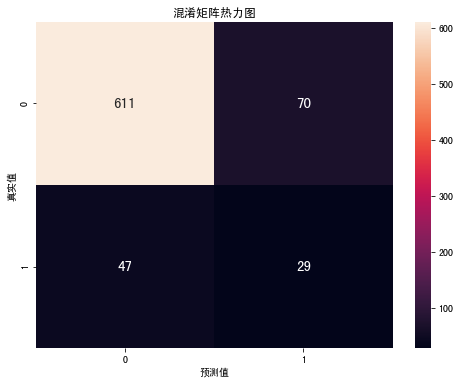

In [257]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=120,max_features=6)
y_pred  = clf.fit(x).predict(x)

y_pred = np.where(y_pred==1, 0, y_pred) 
y_pred = np.where(y_pred==-1, 1, y_pred) 
print('accuracy:',accuracy_score(y,y_pred))
print('recall:',recall_score(y,y_pred))

conf_matrix = confusion_matrix(y_pred,y)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()

可以看到，使用两种离群值检测算法，其中OneClassSVM对于正类(患病类)的预测有了一些提升(53.5%)，但是效果仍然不理想。接下来我们尝试采用合成采样的方法，对少数类样本进行合成填充，提升样本比例。

## <a id=3.5></a>3.5 合成采样
接下来我们采用两种合成采样的方法对数据进行扩充，使两类样本的比例保持平衡。
+ SMOTE过采样
+ ADASYN过采样

SMOTE算法的基本思想是对少数类样本进行分析并根据少数类样本人工合成新样本添加到数据集中。对于少数类样本a, 随机选择一个最近邻的样本b, 然后从a与b的连线上随机选取一个点c作为新的少数类样本。

在对数据集进行划分，接着对训练集进行过采样，将少数类进行扩充。在Python中使用imblearn.over_sampling的SMOTE类构建SMOTE过采样模型。

In [258]:
from imblearn.over_sampling import SMOTE
x_train_resampled, y_train_resampled = SMOTE(random_state=4).fit_sample(x_train, y_train)

在进行过采样后，再分别带入SVM和Xgboost模型进行训练和测试，输出混淆矩阵。

svm: 
 accuracy: 0.8552631578947368
recall: 0.65


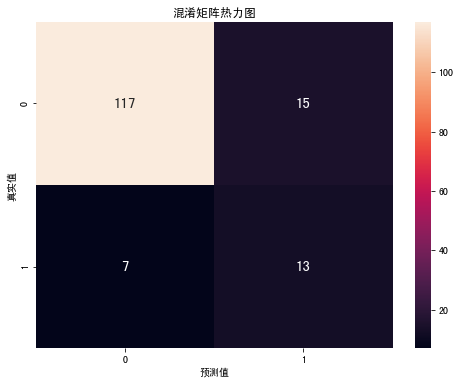

xgboost: 
 accuracy: 0.8486842105263158
recall: 0.35


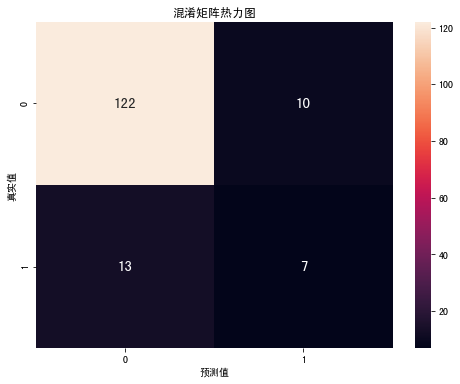

In [259]:
svm = SVC(kernel = 'linear',class_weight='balanced',random_state = 4)
svm.fit(x_train_resampled, y_train_resampled)
y_pred = svm.predict(x_test)
print('svm:','\n','accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()

xgb_model = xgb.XGBClassifier(random_state=42,max_depth = 8 )
xgb_model.fit(x_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(np.array(x_test))

print('xgboost:','\n','accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()

可以看到使用SMOTE过采样之后，SVM中正类样本(患病)的召回率都有明显的提升，SVM的效果优于Xgboost，接下来我们尝试ADASYN过采样方法。<br>
ADASYN算法的基本思想是在K最近邻分类器被错误分类的原始样本附近生成新的少数类样本。

在Python中使用imblearn.over_sampling的ADASYN类构建ADASYN过采样模型。

In [260]:
from imblearn.over_sampling import ADASYN
x_train_resampled, y_train_resampled = ADASYN(random_state=4).fit_sample(x_train, y_train)

在进行过采样后，再分别带入SVM和Xgboost模型进行训练和测试，输出混淆矩阵。

svm: 
 accuracy: 0.8289473684210527
recall: 0.85


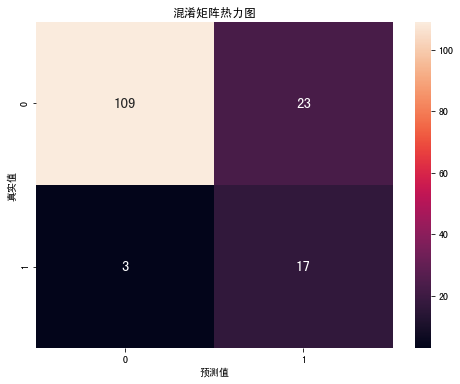

xgboost: 
 accuracy: 0.8421052631578947
recall: 0.2


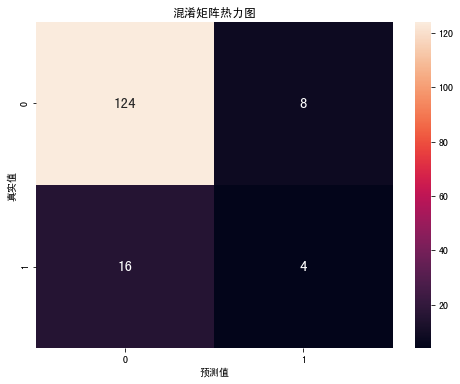

In [261]:
svm = SVC(kernel = 'linear',class_weight='balanced',random_state = 4)
svm.fit(x_train_resampled, y_train_resampled)
y_pred = svm.predict(x_test)
print('svm:','\n','accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()

xgb_model = xgb.XGBClassifier(random_state=42,max_depth = 8 )
xgb_model.fit(x_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(np.array(x_test))
print('xgboost:','\n','accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))

conf_matrix = confusion_matrix(y_test,y_pred)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_matrix,ax=ax,annot=True,annot_kws={'size':15}, fmt='d')
ax.set_ylabel('真实值')
ax.set_xlabel('预测值')
ax.set_title('混淆矩阵热力图')
plt.show()

可以看到使用ADASYN过采样和SMOTE过采样效果相差不大，SVM的表现均优于Xgboost，SMOTE采样后正类(患病)的召回率达到$\frac{13}{20} = 65$%，ADASYN过采样后正类(患病)的召回率为$\frac{17}{20} = 85$%。

# 4.总结

本案例基于宫颈癌诊断数据进行了分析和预测，通过数据预处理、探索性分析和构建预测模型三个阶段对数据进行了深入挖掘。 在数据预处理中，我们根据数据的分布情况删除和填补了对应的缺失值；在数据探索性分析中，我们查看了各个特征的取值分布，挖掘了特征与患病之间的相关性；在构建预测模型过程中，分别使用了SVM(支持向量机)、Xgboost等分类方法；OneClassSVM、IsolationForest等离群值检测方法；SMOTE、ADASYN等合成采样方法，通过对比正类的召回率对模型进行评估，使用合成采样+SVM的预测效果最好。在很多的疾病相关统计中，患病样本的数据量较小，所以会存在样本类别不均衡的问题，本案例的处理方法能够在一定程度上对医疗或疾病预测的问题提供参考。